In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [2]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [3]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [4]:
collection_list = mongo_db.list_collection_names()

In [5]:
exp_name = "sep_levy"

In [6]:
jobs_initial5_Mk10_Mj1_exp = []
jobs_initial5_Mk20_Mj1_exp = []
jobs_initial5_Mk30_Mj1_exp = []
jobs_initial5_Mk50_Mj1_exp = []
jobs_initial5_Mk150_Mj1_exp = []
jobs_initial5_Mk200_Mj1_exp = []
jobs_initial5_Mk250_Mj1_exp = []
jobs_initial5_Mk300_Mj1_exp = []

jobs_initial5_Mk50_Mj1_hyperprior_v2_exp = []
jobs_initial5_Mk200_Mj1_hyperprior_v2_exp = []
jobs_initial5_Mk250_Mj1_hyperprior_v2_exp = []

jobs_saa_cumulative_multi_exp = []
jobs_saa_cumulative_exp = []
jobs_saa_cumulative_v2_exp = []

jobs_saa_cumulative_v2_tight_v2_exp = []

recomm_initial5_Mk10_Mj1_exp = []
recomm_initial5_Mk20_Mj1_exp = []
recomm_initial5_Mk30_Mj1_exp = []
recomm_initial5_Mk50_Mj1_exp = []
recomm_initial5_Mk150_Mj1_exp = []
recomm_initial5_Mk200_Mj1_exp = []
recomm_initial5_Mk250_Mj1_exp = []
recomm_initial5_Mk300_Mj1_exp = []

recomm_initial5_Mk50_Mj1_hyperprior_v2_exp = []
recomm_initial5_Mk200_Mj1_hyperprior_v2_exp = []
recomm_initial5_Mk250_Mj1_hyperprior_v2_exp = []

recomm_saa_cumulative_multi_exp = []
recomm_saa_cumulative_exp = []
recomm_saa_cumulative_v2_exp = []

recomm_saa_cumulative_v2_tight_v2_exp = []

for i in range(25):
    if "%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk20_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk20_Mj1_exp.append(mongo_db["%s_initial5_Mk20_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk30_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk30_Mj1_exp.append(mongo_db["%s_initial5_Mk30_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i)])
    if "%s_initial5_Mk150_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk150_Mj1_exp.append(mongo_db["%s_initial5_Mk150_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i)]) 
    
    if "%s_initial5_Mk50_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk50_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk200_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk250_Mj1_hyperprior_v2-%d.jobs"%(exp_name,i)]) 
    
    if "%s_cumulative_saa_multi-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.jobs"%(exp_name,i)])
    if "%s_cumulative_saa-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa-%d.jobs"%(exp_name,i)])
    if "%s_cumulative_saa_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_v2_exp.append(mongo_db["%s_cumulative_saa_v2-%d.jobs"%(exp_name,i)])
        
    if "%s_cumulative_saa_v2_tight_v2-%d.jobs"%(exp_name,i) in collection_list: jobs_saa_cumulative_v2_tight_v2_exp.append(mongo_db["%s_cumulative_saa_v2_tight_v2-%d.jobs"%(exp_name,i)])
    
    if "%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk20_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk20_Mj1_exp.append(mongo_db["%s_initial5_Mk20_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk30_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk30_Mj1_exp.append(mongo_db["%s_initial5_Mk30_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i)])
    if "%s_initial5_Mk150_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk150_Mj1_exp.append(mongo_db["%s_initial5_Mk150_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i)]) 
        
    if "%s_initial5_Mk50_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk50_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk200_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_hyperprior_v2_exp.append(mongo_db["%s_initial5_Mk250_Mj1_hyperprior_v2-%d.recommendations"%(exp_name,i)]) 
    
    if "%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i)])
    if "%s_cumulative_saa-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_exp.append(mongo_db["%s_cumulative_saa-%d.recommendations"%(exp_name,i)])
    if "%s_cumulative_saa_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_v2_exp.append(mongo_db["%s_cumulative_saa_v2-%d.recommendations"%(exp_name,i)])
        
    if "%s_cumulative_saa_v2_tight_v2-%d.recommendations"%(exp_name,i) in collection_list: recomm_saa_cumulative_v2_tight_v2_exp.append(mongo_db["%s_cumulative_saa_v2_tight_v2-%d.recommendations"%(exp_name,i)])

In [31]:
jobs_initial5_Mk10_Mj1_EI_exp = []
jobs_initial5_Mk20_Mj1_EI_exp = []
jobs_initial5_Mk50_Mj1_EI_exp = []
jobs_initial5_Mk70_Mj1_EI_exp = []

recomm_initial5_Mk10_Mj1_EI_exp = []
recomm_initial5_Mk20_Mj1_EI_exp = []
recomm_initial5_Mk50_Mj1_EI_exp = []
recomm_initial5_Mk70_Mj1_EI_exp = []

for i in range(25):
    if "%s_initial5_Mk10_Mj1_EI-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk10_Mj1_EI-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk20_Mj1_EI-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk20_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk20_Mj1_EI-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1_EI-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk50_Mj1_EI-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk70_Mj1_EI-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk70_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk70_Mj1_EI-%d.jobs"%(exp_name,i)])
        
    if "%s_initial5_Mk10_Mj1_EI-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk10_Mj1_EI-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk20_Mj1_EI-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk20_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk20_Mj1_EI-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1_EI-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk50_Mj1_EI-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk70_Mj1_EI-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk70_Mj1_EI_exp.append(mongo_db["%s_initial5_Mk70_Mj1_EI-%d.recommendations"%(exp_name,i)])

In [30]:
recomm_initial5_Mk30_Mj1_EI_exp

[]

### Get objective method gets the predicted optimal value in GP model

In [32]:
initial5_Mk10_Mj1_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_exp)
initial5_Mk20_Mj1_objs = functions.get_objective(recomm_initial5_Mk20_Mj1_exp)
initial5_Mk30_Mj1_objs = functions.get_objective(recomm_initial5_Mk30_Mj1_exp)
initial5_Mk50_Mj1_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_exp)
initial5_Mk150_Mj1_objs = functions.get_objective(recomm_initial5_Mk150_Mj1_exp)
initial5_Mk200_Mj1_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_exp)
initial5_Mk250_Mj1_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_exp)
initial5_Mk300_Mj1_objs = functions.get_objective(recomm_initial5_Mk300_Mj1_exp)

initial5_Mk50_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_hyperprior_v2_exp)
initial5_Mk200_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_hyperprior_v2_exp)
initial5_Mk250_Mj1_hyperprior_v2_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_hyperprior_v2_exp)

saa_cumulative_multi = functions.get_objective(recomm_saa_cumulative_multi_exp)
saa_cumulative = functions.get_objective(recomm_saa_cumulative_exp)
saa_cumulative_v2 = functions.get_objective(recomm_saa_cumulative_v2_exp)
saa_cumulative_v2_tight_v2 = functions.get_objective(recomm_saa_cumulative_v2_tight_v2_exp)

initial5_Mk10_Mj1_EI_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_EI_exp)
initial5_Mk20_Mj1_EI_objs = functions.get_objective(recomm_initial5_Mk20_Mj1_EI_exp)
initial5_Mk50_Mj1_EI_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_EI_exp)
initial5_Mk70_Mj1_EI_objs = functions.get_objective(recomm_initial5_Mk70_Mj1_EI_exp)

In [33]:
locs_initial5_Mk10_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_exp)
locs_initial5_Mk20_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk20_Mj1_exp)
locs_initial5_Mk30_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk30_Mj1_exp)
locs_initial5_Mk50_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_exp)
locs_initial5_Mk150_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk150_Mj1_exp)
locs_initial5_Mk200_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_exp)
locs_initial5_Mk250_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_exp)
locs_initial5_Mk300_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk300_Mj1_exp)

locs_initial5_Mk50_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_hyperprior_v2_exp)
locs_initial5_Mk200_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_hyperprior_v2_exp)
locs_initial5_Mk250_Mj1_hyperprior_v2_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_hyperprior_v2_exp)

locs_saa_cumulative_multi = functions.get_recomm_loc(recomm_saa_cumulative_multi_exp)
locs_saa_cumulative = functions.get_recomm_loc(recomm_saa_cumulative_exp)
locs_saa_cumulative_v2 = functions.get_recomm_loc(recomm_saa_cumulative_v2_exp)
locs_saa_cumulative_v2_tight_v2 = functions.get_recomm_loc(recomm_saa_cumulative_v2_tight_v2_exp)

locs_initial5_Mk10_Mj1_EI_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_EI_exp)
locs_initial5_Mk20_Mj1_EI_exp = functions.get_recomm_loc(recomm_initial5_Mk20_Mj1_EI_exp)
locs_initial5_Mk50_Mj1_EI_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_EI_exp)
locs_initial5_Mk70_Mj1_EI_exp = functions.get_recomm_loc(recomm_initial5_Mk70_Mj1_EI_exp)

### Getting immediate Regret IR measure

In [34]:
def levy_4d(x1,x2,x3,x4):
	w1 = 1 + (x1-1)/4
	w2 = 1 + (x2-1)/4
	w3 = 1 + (x3-1)/4
	w4 = 1 + (x4-1)/4

	a = np.sin(np.pi * w1)**2
	b = ((w1-1)**2)*(1+10*(np.sin(np.pi*w1+1)**2)) + ((w2-1)**2)*(1+10*(np.sin(np.pi*w2+1)**2)) + ((w3-1)**2)*(1+10*(np.sin(np.pi*w3+1)**2)) 
	c = ((w4-1)**2) * (1 + (np.sin(2*np.pi*w4)**2))

	result = a + b + c

	return result

In [35]:
opt_val = 0

In [36]:
def get_sugg_obj_exp(locs_exp):
    obj_exp = []
    for exp_num in range(len(locs_exp)):
        objs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[exp_num])):
            objs_iter.append(levy_4d(*locs_cur_exp[idx]))
            
        obj_exp.append(objs_iter)
        
    return obj_exp

In [37]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - levy_4d(*input_list)))

In [38]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[0])):
            
            irs_iter.append(log_ir(locs_cur_exp[idx]))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [39]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [40]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [41]:
def get_std_err_irs(irs_exp):
    std_err_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        std_err_irs.append(np.std(cur_iter_irs))
        
    return std_err_irs

### Getting the 'real' value of functions at suggested locations

In [42]:
minimum = 35
for exp in locs_initial5_Mk150_Mj1_exp:
    minimum = minimum if len(exp) > minimum else len(exp)
    
locs_initial5_Mk150_Mj1_exp = [list_[:minimum] for list_ in locs_initial5_Mk150_Mj1_exp]

minimum = 35
for exp in locs_saa_cumulative_v2_tight_v2:
    minimum = minimum if len(exp) > minimum else len(exp)
    
locs_saa_cumulative_v2_tight_v2 = [list_[:minimum] for list_ in locs_saa_cumulative_v2_tight_v2]

In [43]:
minimum

31

In [44]:
sugg_obj_initial5_Mk10_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_exp)
sugg_obj_initial5_Mk20_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk20_Mj1_exp)
sugg_obj_initial5_Mk30_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk30_Mj1_exp)
sugg_obj_initial5_Mk50_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_exp)
sugg_obj_initial5_Mk150_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk150_Mj1_exp)
sugg_obj_initial5_Mk200_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_exp)
sugg_obj_initial5_Mk250_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_exp)
sugg_obj_initial5_Mk300_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk300_Mj1_exp)

sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_hyperprior_v2_exp)
sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_hyperprior_v2_exp)
sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_hyperprior_v2_exp)

sugg_obj_cumulative_saa_multi_exp = get_sugg_obj_exp(locs_saa_cumulative_multi)
sugg_obj_cumulative_saa_exp = get_sugg_obj_exp(locs_saa_cumulative)
sugg_obj_cumulative_saa_v2_exp = get_sugg_obj_exp(locs_saa_cumulative_v2)

sugg_obj_cumulative_saa_v2_tight_v2_exp = get_sugg_obj_exp(locs_saa_cumulative_v2_tight_v2)

sugg_obj_initial5_Mk10_Mj1_EI_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_EI_exp)
sugg_obj_initial5_Mk20_Mj1_EI_exp = get_sugg_obj_exp(locs_initial5_Mk20_Mj1_EI_exp)
sugg_obj_initial5_Mk50_Mj1_EI_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_EI_exp)
sugg_obj_initial5_Mk70_Mj1_EI_exp = get_sugg_obj_exp(locs_initial5_Mk70_Mj1_EI_exp)

#### averaging values of each experiments

In [78]:
avg_sugg_obj_initial5_Mk10_Mj1 = np.average(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk20_Mj1 = np.average(sugg_obj_initial5_Mk20_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk30_Mj1 = np.average(sugg_obj_initial5_Mk30_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1 = np.average(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk150_Mj1 = np.average(sugg_obj_initial5_Mk150_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk200_Mj1 = np.average(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk250_Mj1 = np.average(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk300_Mj1 = np.average(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

avg_sugg_obj_initial5_Mk50_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp, axis=0)
avg_sugg_obj_initial5_Mk200_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp, axis=0)
avg_sugg_obj_initial5_Mk250_Mj1_hyperprior_v2 = np.average(sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp, axis=0)

avg_sugg_obj_saa_cumulative_multi = np.average(sugg_obj_cumulative_saa_multi_exp, axis=0)
avg_sugg_obj_saa_cumulative = np.average(sugg_obj_cumulative_saa_exp, axis=0)
avg_sugg_obj_saa_cumulative_v2 = np.average(sugg_obj_cumulative_saa_v2_exp, axis=0)

avg_sugg_obj_saa_cumulative_v2_tight_v2 = np.average(sugg_obj_cumulative_saa_v2_tight_v2_exp, axis=0)

avg_sugg_obj_initial5_Mk10_Mj1_EI = np.average(sugg_obj_initial5_Mk10_Mj1_EI_exp, axis=0)
avg_sugg_obj_initial5_Mk20_Mj1_EI = np.average(sugg_obj_initial5_Mk20_Mj1_EI_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1_EI = np.average(sugg_obj_initial5_Mk50_Mj1_EI_exp, axis=0)
avg_sugg_obj_initial5_Mk70_Mj1_EI = np.average(sugg_obj_initial5_Mk70_Mj1_EI_exp, axis=0)

In [79]:
sugg_obj_initial5_Mk10_Mj1_std_err = np.std(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
sugg_obj_initial5_Mk20_Mj1_std_err = np.std(sugg_obj_initial5_Mk20_Mj1_exp, axis=0)
sugg_obj_initial5_Mk30_Mj1_std_err = np.std(sugg_obj_initial5_Mk30_Mj1_exp, axis=0)
sugg_obj_initial5_Mk50_Mj1_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
sugg_obj_initial5_Mk150_Mj1_std_err = np.std(sugg_obj_initial5_Mk150_Mj1_exp, axis=0)
sugg_obj_initial5_Mk200_Mj1_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
sugg_obj_initial5_Mk250_Mj1_std_err = np.std(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
sugg_obj_initial5_Mk300_Mj1_std_err = np.std(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_hyperprior_v2_exp, axis=0)
sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_hyperprior_v2_exp, axis=0)
sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_std_err = np.std(sugg_obj_initial5_Mk250_Mj1_hyperprior_v2_exp, axis=0)

sugg_obj_cumulative_saa_multi_std_err = np.std(sugg_obj_cumulative_saa_multi_exp, axis=0)
sugg_obj_cumulative_saa_std_err = np.std(sugg_obj_cumulative_saa_exp, axis=0)
sugg_obj_cumulative_saa_v2_std_err = np.std(sugg_obj_cumulative_saa_v2_exp, axis=0)

sugg_obj_cumulative_saa_v2_tight_v2_std_err = np.std(sugg_obj_cumulative_saa_v2_tight_v2_exp, axis=0)

sugg_obj_initial5_Mk10_Mj1_EI_std_err = np.std(sugg_obj_initial5_Mk10_Mj1_EI_exp, axis=0)
sugg_obj_initial5_Mk20_Mj1_EI_std_err = np.std(sugg_obj_initial5_Mk20_Mj1_EI_exp, axis=0)
sugg_obj_initial5_Mk50_Mj1_EI_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_EI_exp, axis=0)
sugg_obj_initial5_Mk70_Mj1_EI_std_err = np.std(sugg_obj_initial5_Mk70_Mj1_EI_exp, axis=0)

### Getting IR values for look optimization performances

In [80]:
irs_initial5_Mk10_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk300_Mj1_exp)

irs_initial5_Mk50_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_hyperprior_v2_exp)
irs_initial5_Mk200_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_hyperprior_v2_exp)
irs_initial5_Mk250_Mj1_hyperprior_v2_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_hyperprior_v2_exp)

irs_cumulative_saa_multi_exp = get_irs_whole_exp(locs_saa_cumulative_multi)
irs_cumulative_saa_exp = get_irs_whole_exp(locs_saa_cumulative)
irs_cumulative_saa_v2_exp = get_irs_whole_exp(locs_saa_cumulative_v2)

irs_cumulative_saa_v2_tight_v2_exp = get_irs_whole_exp(locs_saa_cumulative_v2_tight_v2)

irs_initial5_Mk10_Mj1_EI_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_EI_exp)
irs_initial5_Mk20_Mj1_EI_exp = get_irs_whole_exp(locs_initial5_Mk20_Mj1_EI_exp)
irs_initial5_Mk50_Mj1_EI_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_EI_exp)
irs_initial5_Mk70_Mj1_EI_exp = get_irs_whole_exp(locs_initial5_Mk70_Mj1_EI_exp)

### Get averaged and median value of IR

In [82]:
irs_initial5_Mk10_Mj1_avg = get_avg_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_avg = get_avg_irs(irs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_avg = get_avg_irs(irs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_avg = get_avg_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_avg = get_avg_irs(irs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_avg = get_avg_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_avg = get_avg_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_avg = get_avg_irs(irs_initial5_Mk300_Mj1_exp)

irs_initial5_Mk50_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk50_Mj1_hyperprior_v2_exp)
irs_initial5_Mk200_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk200_Mj1_hyperprior_v2_exp)
irs_initial5_Mk250_Mj1_hyperprior_v2_avg = get_avg_irs(irs_initial5_Mk250_Mj1_hyperprior_v2_exp)

irs_cumulative_saa_multi_avg = get_avg_irs(irs_cumulative_saa_multi_exp)
irs_cumulative_saa_avg = get_avg_irs(irs_cumulative_saa_exp)
irs_cumulative_saa_v2_avg = get_avg_irs(irs_cumulative_saa_v2_exp)
irs_cumulative_saa_v2_tight_v2_avg = get_avg_irs(irs_cumulative_saa_v2_tight_v2_exp)

irs_initial5_Mk10_Mj1_EI_avg = get_avg_irs(irs_initial5_Mk10_Mj1_EI_exp)
irs_initial5_Mk20_Mj1_EI_avg = get_avg_irs(irs_initial5_Mk20_Mj1_EI_exp)
irs_initial5_Mk50_Mj1_EI_avg = get_avg_irs(irs_initial5_Mk50_Mj1_EI_exp)
irs_initial5_Mk70_Mj1_EI_avg = get_avg_irs(irs_initial5_Mk70_Mj1_EI_exp)

In [83]:
irs_initial5_Mk10_Mj1_median = get_median_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_median = get_median_irs(irs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_median = get_median_irs(irs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_median = get_median_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_median = get_median_irs(irs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_median = get_median_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_median = get_median_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_median = get_median_irs(irs_initial5_Mk300_Mj1_exp)

irs_initial5_Mk50_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk50_Mj1_hyperprior_v2_exp)
irs_initial5_Mk200_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk200_Mj1_hyperprior_v2_exp)
irs_initial5_Mk250_Mj1_hyperprior_v2_median = get_median_irs(irs_initial5_Mk250_Mj1_hyperprior_v2_exp)

irs_saa_cumulative_multi_median = get_median_irs(irs_cumulative_saa_multi_exp)
irs_saa_cumulative_median = get_median_irs(irs_cumulative_saa_exp)
irs_saa_cumulative_v2_median = get_median_irs(irs_cumulative_saa_v2_exp)
irs_saa_cumulative_v2_tight_v2_median = get_median_irs(irs_cumulative_saa_v2_tight_v2_exp)

irs_initial5_Mk10_Mj1_EI_median = get_median_irs(irs_initial5_Mk10_Mj1_EI_exp)
irs_initial5_Mk20_Mj1_EI_median = get_median_irs(irs_initial5_Mk20_Mj1_EI_exp)
irs_initial5_Mk50_Mj1_EI_median = get_median_irs(irs_initial5_Mk50_Mj1_EI_exp)
irs_initial5_Mk70_Mj1_EI_median = get_median_irs(irs_initial5_Mk70_Mj1_EI_exp)

In [84]:
irs_initial5_Mk10_Mj1_std_err = get_std_err_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk20_Mj1_std_err = get_std_err_irs(irs_initial5_Mk20_Mj1_exp)
irs_initial5_Mk30_Mj1_std_err = get_std_err_irs(irs_initial5_Mk30_Mj1_exp)
irs_initial5_Mk50_Mj1_std_err = get_std_err_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk150_Mj1_std_err = get_std_err_irs(irs_initial5_Mk150_Mj1_exp)
irs_initial5_Mk200_Mj1_std_err = get_std_err_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_std_err = get_std_err_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_std_err = get_std_err_irs(irs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_std_err = get_std_err_irs(irs_cumulative_saa_multi_exp)
irs_cumulative_saa_std_err = get_std_err_irs(irs_cumulative_saa_exp)
irs_cumulative_saa_v2_std_err = get_std_err_irs(irs_cumulative_saa_v2_exp)
irs_cumulative_saa_v2_tight_v2_std_err = get_std_err_irs(irs_cumulative_saa_v2_tight_v2_exp)

irs_initial5_Mk10_Mj1_EI_std_err = get_std_err_irs(irs_initial5_Mk10_Mj1_EI_exp)
irs_initial5_Mk20_Mj1_EI_std_err = get_std_err_irs(irs_initial5_Mk20_Mj1_EI_exp)
irs_initial5_Mk50_Mj1_EI_std_err = get_std_err_irs(irs_initial5_Mk50_Mj1_EI_exp)
irs_initial5_Mk70_Mj1_EI_std_err = get_std_err_irs(irs_initial5_Mk70_Mj1_EI_exp)

### Plotting the real function value at suggested location

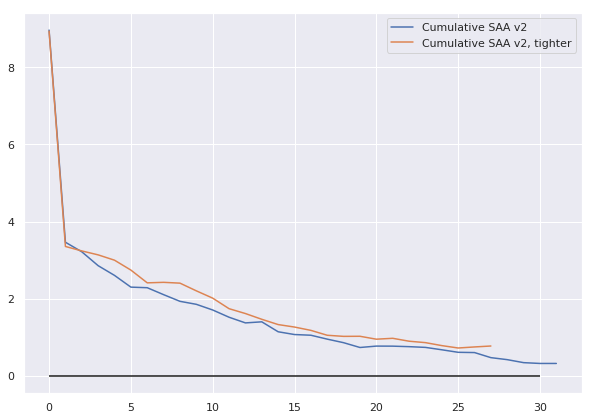

In [52]:
plt.figure(figsize=(10,7))

plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA v2, tighter")
plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

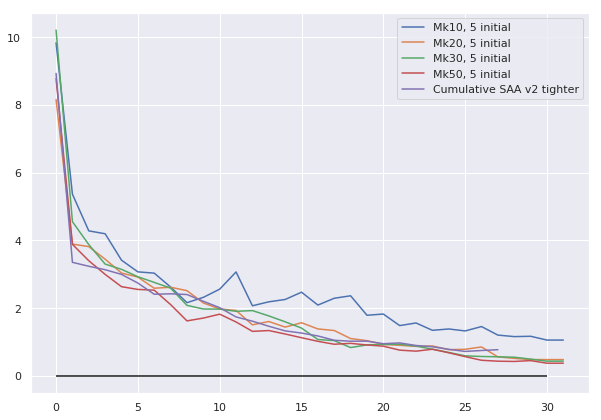

In [53]:
plt.figure(figsize=(10,7))
plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk20_Mj1[3:], label="Mk20, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk30_Mj1[3:], label="Mk30, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")

#plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")
plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA v2 tighter")
plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

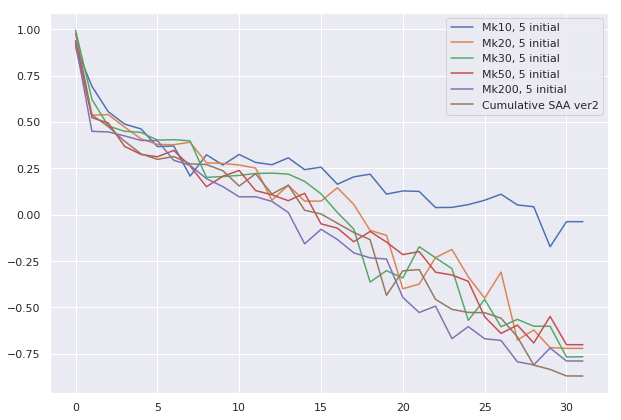

In [54]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk10_Mj1_median[3:], label="Mk10, 5 initial")
plt.plot(irs_initial5_Mk20_Mj1_median[3:], label="Mk20, 5 initial")
plt.plot(irs_initial5_Mk30_Mj1_median[3:], label="Mk30, 5 initial")
plt.plot(irs_initial5_Mk50_Mj1_median[3:], label='Mk50, 5 initial')

plt.plot(irs_initial5_Mk200_Mj1_median[3:], label='Mk200, 5 initial')


plt.plot(irs_saa_cumulative_v2_median[3:], label="Cumulative SAA ver2")

plt.legend()
plt.show()

### EI 

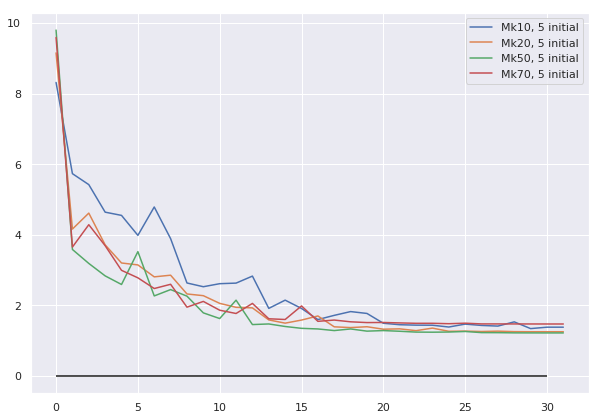

In [86]:
plt.figure(figsize=(10,7))
plt.plot(avg_sugg_obj_initial5_Mk10_Mj1_EI[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk20_Mj1_EI[3:], label="Mk20, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1_EI[3:], label="Mk50, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk70_Mj1_EI[3:], label="Mk70, 5 initial")

plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

### EI vs PES

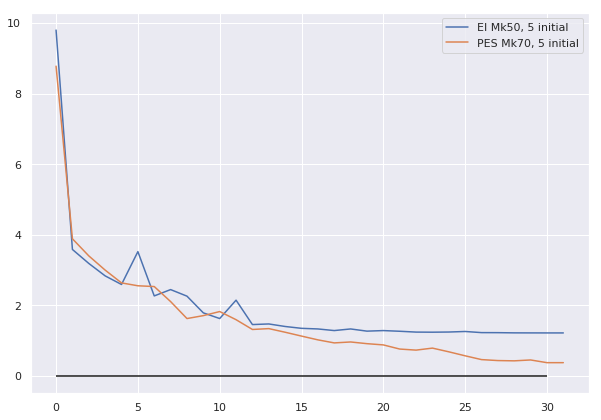

In [88]:
plt.figure(figsize=(10,7))
# plt.plot(avg_sugg_obj_initial5_Mk10_Mj1_EI[3:], label="EI Mk10, 5 initial")
# plt.plot(avg_sugg_obj_initial5_Mk20_Mj1_EI[3:], label="EI Mk20, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1_EI[3:], label="EI Mk50, 5 initial")
# plt.plot(avg_sugg_obj_initial5_Mk70_Mj1_EI[3:], label="EI Mk70, 5 initial")

# plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="PES Mk10, 5 initial")
# plt.plot(avg_sugg_obj_initial5_Mk20_Mj1[3:], label="PES Mk20, 5 initial")
# plt.plot(avg_sugg_obj_initial5_Mk30_Mj1[3:], label="PES Mk50, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="PES Mk70, 5 initial")

plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

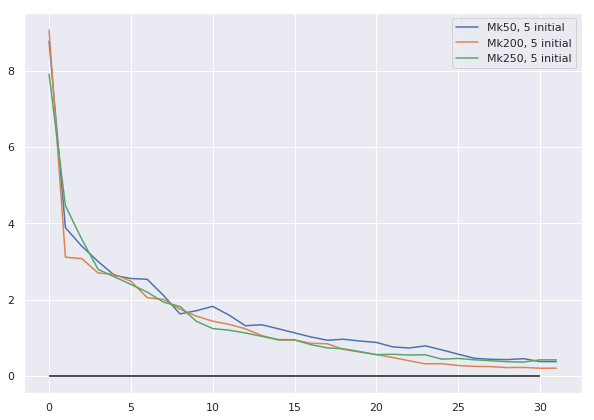

In [55]:
plt.figure(figsize=(10,7))
#plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk150_Mj1[3:], label="Mk150, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")
#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
#plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="SAA cumulative multi start")
#plt.plot(avg_sugg_obj_saa_cumulative[3:], label='SAA cumulative')
plt.legend()
plt.show()

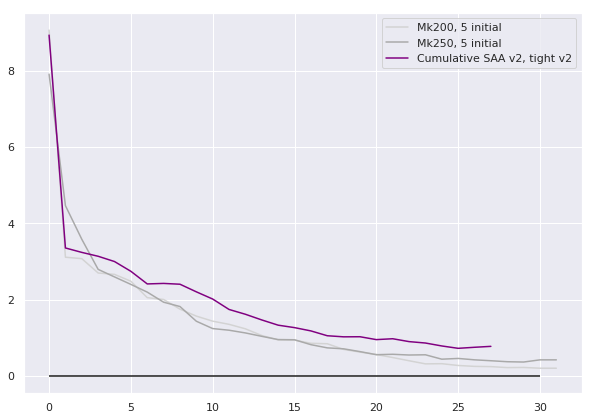

In [56]:
plt.figure(figsize=(10,7))
#plt.plot(avg_sugg_obj_initial5_Mk30_Mj1[3:], label="Mk10, 5 initial")
#plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial", color='r')

#plt.plot(avg_sugg_obj_initial5_Mk150_Mj1[3:], label="Mk150, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial", color='lightgrey')

plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial", color='darkgrey')
#plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")
#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
plt.plot(avg_sugg_obj_saa_cumulative_v2_tight_v2[3:], label="Cumulative SAA v2, tight v2",color='purple')
#plt.plot(avg_sugg_obj_saa_cumulative_multi[3:], label="SAA cumulative multi start")
#plt.plot(avg_sugg_obj_saa_cumulative[3:], label='SAA cumulative')
plt.hlines(opt_val, xmin=0, xmax=30, colors='k')
plt.legend()
plt.show()

### SAA vs fixed Mk

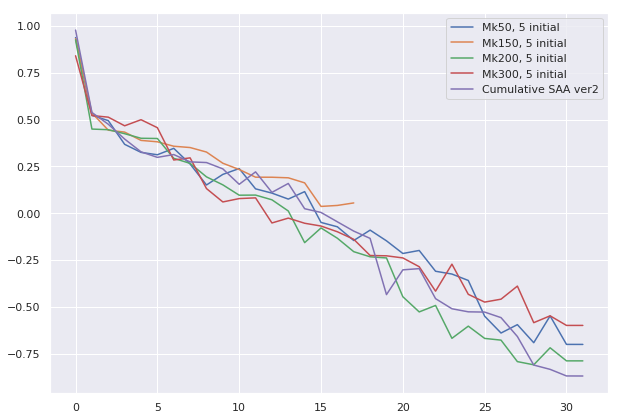

In [57]:
plt.figure(figsize=(10,7))
#plt.plot(irs_initial5_Mk10_Mj1_median[3:], label="Mk10, 5 initial")
plt.plot(irs_initial5_Mk50_Mj1_median[3:], label='Mk50, 5 initial')
plt.plot(irs_initial5_Mk150_Mj1_median[3:], label='Mk150, 5 initial')
plt.plot(irs_initial5_Mk200_Mj1_median[3:], label='Mk200, 5 initial')

plt.plot(irs_initial5_Mk300_Mj1_median[3:], label='Mk300, 5 initial')
plt.plot(irs_saa_cumulative_v2_median[3:], label="Cumulative SAA ver2")

plt.legend()
plt.show()

### Hyperprior에 따른 성능

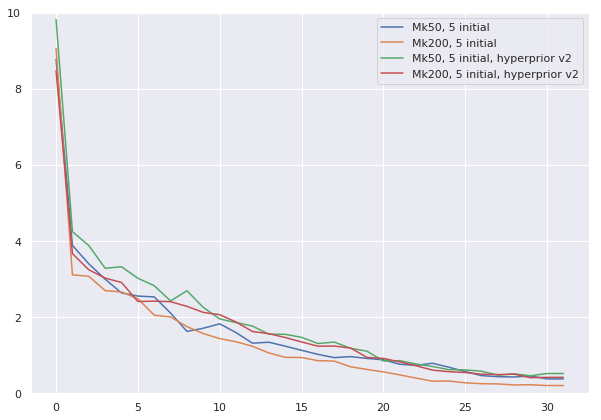

In [58]:
plt.figure(figsize=(10,7))

# plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")


plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")


#lt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
# plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk50_Mj1_hyperprior_v2[3:], label="Mk50, 5 initial, hyperprior v2")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1_hyperprior_v2[3:], label="Mk200, 5 initial, hyperprior v2")
#lt.plot(avg_sugg_obj_initial5_Mk250_Mj1_hyperprior_v2[3:], label="Mk250, 5 initial, hyperprior v2")

#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")
#plt.plot(avg_sugg_obj_cumulative_multi[3:], label="cumulative SAA, multiStart")
plt.ylim(ymin=0, ymax=10)
plt.legend()
plt.show()

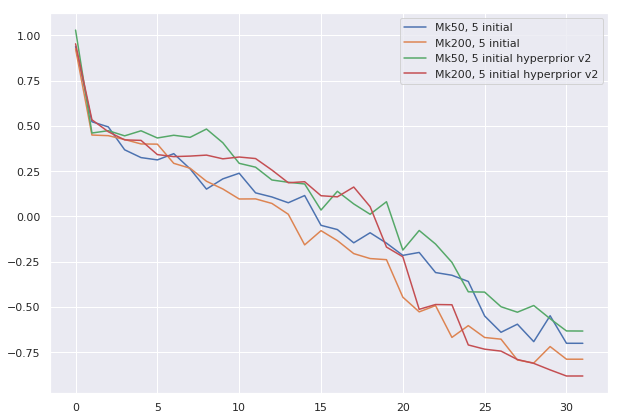

In [59]:
plt.figure(figsize=(10,7))

plt.plot(irs_initial5_Mk50_Mj1_median[3:], label='Mk50, 5 initial')
plt.plot(irs_initial5_Mk200_Mj1_median[3:], label='Mk200, 5 initial')

plt.plot(irs_initial5_Mk50_Mj1_hyperprior_v2_median[3:], label='Mk50, 5 initial hyperprior v2')
plt.plot(irs_initial5_Mk200_Mj1_hyperprior_v2_median[3:], label='Mk200, 5 initial hyperprior v2')



plt.legend()
plt.show()

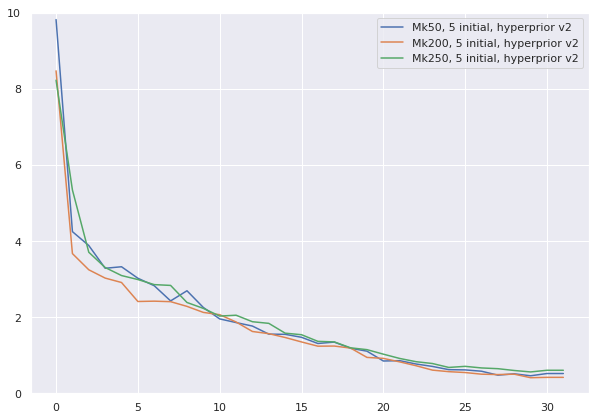

In [60]:
plt.figure(figsize=(10,7))

plt.plot(avg_sugg_obj_initial5_Mk50_Mj1_hyperprior_v2[3:], label="Mk50, 5 initial, hyperprior v2")

plt.plot(avg_sugg_obj_initial5_Mk200_Mj1_hyperprior_v2[3:], label="Mk200, 5 initial, hyperprior v2")


plt.plot(avg_sugg_obj_initial5_Mk250_Mj1_hyperprior_v2[3:], label="Mk250, 5 initial, hyperprior v2")

#plt.plot(avg_sugg_obj_saa_cumulative_v2[3:], label="Cumulative SAA v2")

plt.ylim(ymin=0, ymax=10)
plt.legend()
plt.show()

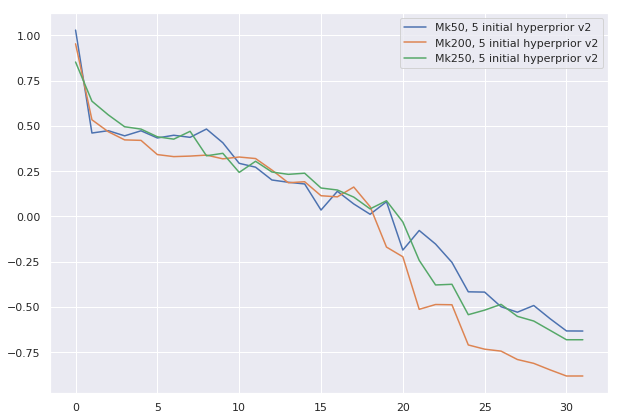

In [61]:
plt.figure(figsize=(10,7))

plt.plot(irs_initial5_Mk50_Mj1_hyperprior_v2_median[3:], label='Mk50, 5 initial hyperprior v2')
plt.plot(irs_initial5_Mk200_Mj1_hyperprior_v2_median[3:], label='Mk200, 5 initial hyperprior v2')
plt.plot(irs_initial5_Mk250_Mj1_hyperprior_v2_median[3:], label='Mk250, 5 initial hyperprior v2')



plt.legend()
plt.show()

In [62]:
cumulative_saa_v2_mks_exp = functions.get_mks(recomm_saa_cumulative_v2_exp)

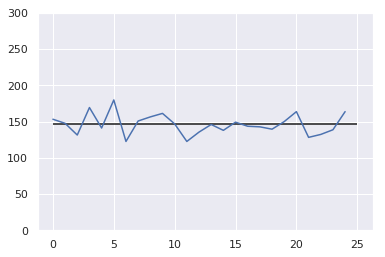

In [63]:
each_iter_avg_mk = [ np.average(cumulative_saa_v2_mks_exp[iter_num][4:], axis=0) for iter_num in range(len(cumulative_saa_v2_mks_exp))]
plt.plot(each_iter_avg_mk)
plt.hlines(np.average(each_iter_avg_mk), xmin=0, xmax=25)
plt.ylim(ymin=0, ymax=300)
plt.show()

### Plotting with error

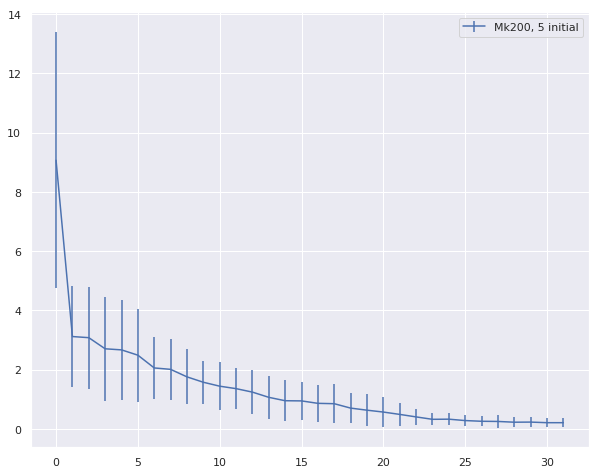

In [64]:
plt.figure(figsize=(10,8))
plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
             avg_sugg_obj_initial5_Mk200_Mj1[3:],
            sugg_obj_initial5_Mk200_Mj1_std_err[3:], label = "Mk200, 5 initial")
# plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
#              avg_sugg_obj_initial5_Mk10_Mj1[3:],
#             sugg_obj_initial5_Mk10_Mj1_std_err[3:], label = "Mk200, 5 initial")
plt.legend()

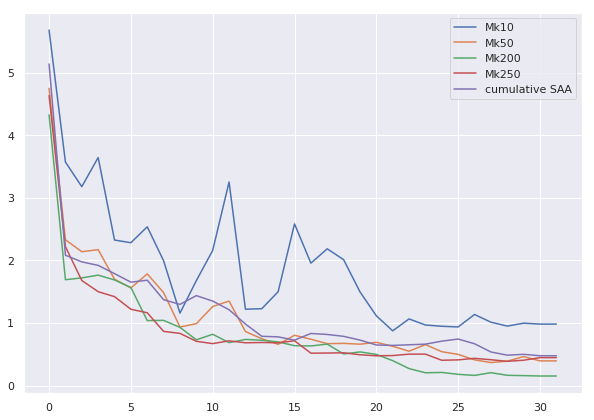

In [65]:
plt.figure(figsize=(10,7))

plt.plot(sugg_obj_initial5_Mk10_Mj1_std_err[3:],label="Mk10")
plt.plot(sugg_obj_initial5_Mk50_Mj1_std_err[3:],label="Mk50")
plt.plot(sugg_obj_initial5_Mk200_Mj1_std_err[3:],label="Mk200")
plt.plot(sugg_obj_initial5_Mk250_Mj1_std_err[3:],label="Mk250")
#plt.plot(sugg_obj_initial5_Mk300_Mj1_std_err[3:],label="Mk300")
plt.plot(sugg_obj_cumulative_saa_multi_std_err[3:], label="cumulative SAA")
#plt.ylim(ymin=0, ymax=10)
plt.legend()


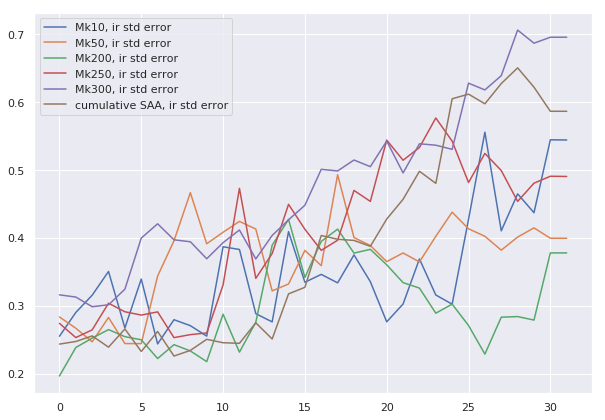

In [66]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk10_Mj1_std_err[3:], label="Mk10, ir std error")
plt.plot(irs_initial5_Mk50_Mj1_std_err[3:], label="Mk50, ir std error")
plt.plot(irs_initial5_Mk200_Mj1_std_err[3:], label="Mk200, ir std error")
plt.plot(irs_initial5_Mk250_Mj1_std_err[3:], label="Mk250, ir std error")
plt.plot(irs_initial5_Mk300_Mj1_std_err[3:], label="Mk300, ir std error")
plt.plot(irs_cumulative_saa_multi_std_err[3:], label="cumulative SAA, ir std error")
plt.legend()
plt.show()

In [67]:
cumulative_saa_mks_exp = functions.get_mks(recomm_saa_cumulative_exp)

In [68]:
avg_mks = [np.average(mks_exp[4:]) for mks_exp in cumulative_saa_mks_exp]

In [69]:
np.average(avg_mks)

159.0

In [70]:
cumulative_saa_tight_v2_mks_exp = functions.get_mks(recomm_saa_cumulative_v2_tight_v2_exp)

In [71]:
avg_tight_v2 = [np.average(mks_exp[4:]) for mks_exp in cumulative_saa_tight_v2_mks_exp]

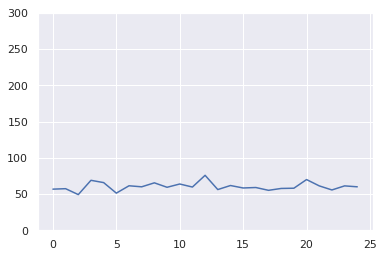

In [72]:
plt.plot(avg_tight_v2)
plt.ylim(ymin=0, ymax = 300)
plt.show()